# Linear Regression with Eager API

A linear regression implemented using TensorFlow's Eager API.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
# Set Eager API
tfe.enable_eager_execution()

In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 31.307329178 W= -0.7870768 b= -0.2507985
Epoch: 0001 cost= 9.502781868 W= -0.26173288 b= -0.17560114
Epoch: 0100 cost= 0.114994615 W= 0.36224815 b= 0.014603348
Epoch: 0200 cost= 0.106785327 W= 0.34959725 b= 0.104292504
Epoch: 0300 cost= 0.100346453 W= 0.33839324 b= 0.1837239
Epoch: 0400 cost= 0.095296182 W= 0.32847065 b= 0.25407064
Epoch: 0500 cost= 0.091335081 W= 0.3196829 b= 0.3163719
Epoch: 0600 cost= 0.088228233 W= 0.31190023 b= 0.37154746
Epoch: 0700 cost= 0.085791394 W= 0.30500764 b= 0.42041263
Epoch: 0800 cost= 0.083880097 W= 0.2989034 b= 0.46368918
Epoch: 0900 cost= 0.082380980 W= 0.2934973 b= 0.50201607
Epoch: 1000 cost= 0.081205189 W= 0.28870946 b= 0.5359594


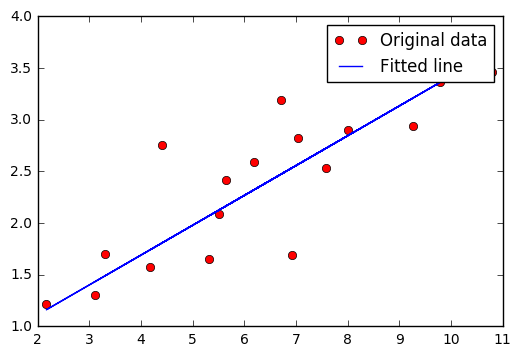

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()